<a href="https://colab.research.google.com/github/jsleeg98/deeplearning_from_scratch/blob/main/ch6_%ED%95%99%EC%8A%B5_%EA%B4%80%EB%A0%A8_%EA%B8%B0%EC%88%A0%EB%93%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.1 매개변수 갱신

* 신경망 학습은 손실함수 값을 가능한 낮추는 매개변수를 찾는 것이다.

  ▶ 최적화문제(매개변수 최적값을 찾는 문제)

## 6.1.1 모험가 이야기

모험가는 어둠의 세계를 탐험하며 가장 깊은 곳으로 들어가기 위해서 발바닥의 감각(기울기)만으로 이동하는 것이 모델이 학습하는 과정과 비슷하다.

## 6.1.2 확률적 경사 하강법(SGD)
* GD(Gradient Descent)와 SGD(Stochastic Gradient Descent)의 차이점
  - GD는 모든 학습 데이터에 대해 Gradient를 구하여 학습하는 것을 말한다. SGD는 일부 학습 데이터에 대해 Gradient를 구하여 학습하는 것을 말하는데 사실 mini-batch 단위로 데이터를 뽑아 학습하는 과정이 SGD였다.

* SGD 수식

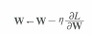


In [ ]:
# SGD 구현
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

## 6.1.3 SGD의 단점

다음 함수의 최솟값을 찾는 문제

image.png

함수의 그래프

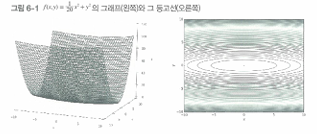

함수의 그래프

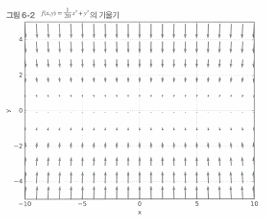

함수의 기울기를 보면 y축 방향으로는 가파른데 x축 방향은 완만한 것을 확인할 수 있다.

이 때 이 함수에 SGD를 적용하면 결과는 다음과 같다.

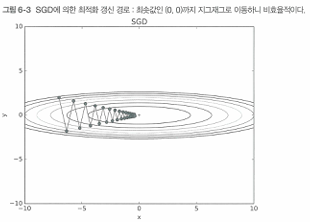

결과적으로 최적화 경로가 심하게 굽이치면서 비효율적으로 갱신된다는 것을 확인할 수 있습니다. 

따라서 이를 더 효율적으로 하고자 모멘텀, AdaGrad, Adam 기법을 소개합니다.

## 6.1.4 모멘텀

모멘텀은 '운동량'을 뜻하는 단어로 수식은 다음과 같습니다.

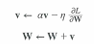

여기서 v라는 새로운 변수가 등장합니다.

v는 속도를 의미하고 이는 기울기가 가파른 곳에서는 빨리가고 기울기가 가파르지 않은 곳에서는 느리게 가도록 값을 갱신하게 됩니다.

In [ ]:
import numpy as np

class Momentum:
  def __init__(self, lr = 0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None
  
  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v[key] = self.momentum*self.v[key] - self.lr * grads[key]
      params[key] += self.v[key]

Momentum을 활용하여 문제를 해결한다면 다음과 같습니다.

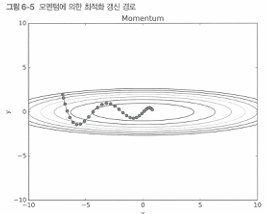

위 그림을 보면 값이 최적화 되는 경로의 '지그재그 정도'가 덜한 것을 알 수 있습니다. 

이는 x축의 힘은 아주 작지만 방향은 변하기 않아서 한 방향으로 일정하게 가속하기 때문입니다. 또한 y축의 힘은 크기만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않습니다.

## 6.1.5 AdaGrad

신경망 학습에서는 learning rate 값이 중요합니다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 너무 크면 발산하여 학습이 제대로 이뤄지지 않습니다.

learning rate를 정하는 효과적 기술로는 learning rate를 감소시키는 방식이 있습니다. 이는 학습을 진행하면서 lr 값을 점차 줄이는 방식이고, 여기에서 발전하여 매개변수마다 각각 알맞게 줄이는 방식이 AdaGrad 입니다.

수식은 다음과 같습니다.

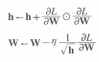

수식을 보면 새로운 변수 h가 등장하비다. h는 기존 기울기 값을 제곱하여 계속 더해주는 방식으로 매개변수 갱신 시 $\frac{1}{\sqrt{h}}$를 곱해 학습률을 갱신합니다. 

이는 그게 갱신된 매개변수는 lr를 낮춘다는 것을 말하며 이것이 각 원소마다 각각 적용됩니다.

In [ ]:
from typing_extensions import ParamSpecKwargs
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None 

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)

    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)                                

AdaGrad를 활용하여 문제를 해결하며 다음과 같습니다.

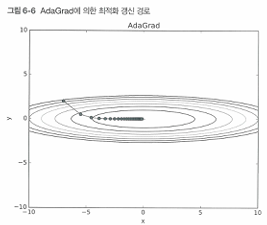

결과를 보면 최솟값을 향해 효율적으로 움직이는 것을 알 수 있습니다. y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정됩니다. 따라서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어듭니다.

## 6.1.6 Adam

Adam은 Momentum과 AdaGrad 기법을 융합한 기법이라고 생각하면 됩니다. 

이를 통해 문제를 해결한 모습은 다음과 같습니다.

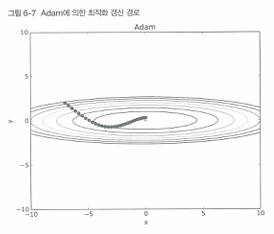

결과를 보면 모멘텀과 비슷하지만 좌우 흔들짐이 적다는 것을 확인 할 수 있고 이는 학습의 갱신 강도를 적응적으로 조정했기 때문입니다.

## 6.1.7 어느 갱신 방법을 이용할 것인가?

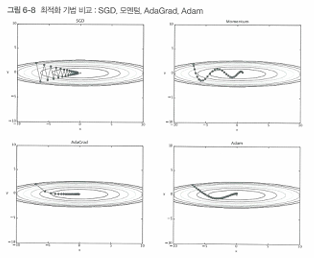

4가지 기법을 비교하면 다음과 같습니다. 이 그림에서는 AdaGrad가 가장 좋은 것 같지만 풀어야할 문제가 무엇인가에 따라 결과는 매우 달라집니다. 또한 learning rate과 같이 하이퍼파라미터를 어떻게 설정하느냐도 학습의 중요한 요소가 됩니다.

SGD, 모멘텀, AdaGrad, Adam 중에서 모든 문제에 뛰어난 기법은 없고 각각 장단이 있습니다.

보통 SGD를 많이 활용하며, 이 책에서는 주로 SGD와 Adam을 사용합니다. 하지만 이는 각자의 상황을 고려해 시도해보고 결과를 분석해보는 것이 현명합니다.

## 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

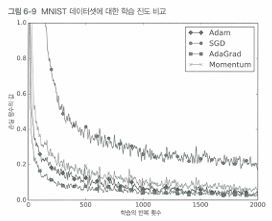

위 결과를 보면 SGD의 학습 진도가 가장 느리다는 것을 확인할 수 있습니다. 또한 다른 하이퍼파라미터에 따라 결과는 매우 달라질 수 있습니다.

일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높게 나타납니다.

# 6.2 가중치의 초깃값

신경망 학습에서 특히 중요한 것이 가중치의 초깃값 입니다. 이는 어느 위치에서 시작하느냐의 문제이기 때문입니다.


## 6.2.1 초깃값을 0으로 하면?

성능을 높이는 방법 👉 오버피팅을 억제 👉 가중치 감소(weight decay) 활용하여 가중치 값을 작게 하기

지금까지는 가중치의 초기값을 0.01* np.random.randn(10, 100)처럼 정규분포에서 생성되는 값을 0.01배 한 작은 값을 사용했다.

그렇다면 초깃값을 0으로 시작하면 좋은거 아닌가?

👉 가중치를 균일한 값으로 설정해서는 안된다. 그 이유는 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다.

👉 초깃값을 무작위로 설정해야한다.

## 6.2.2 은닉층의 활성화값 분포

은닉층의 활성화 함수의 출력 데이터의 분포를 관찰하면 중요한 정보를 얻을 수 있다.

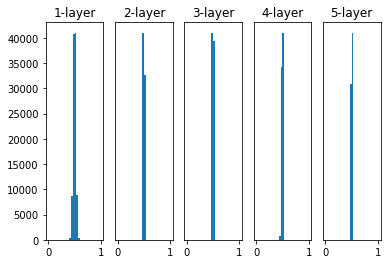

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
  return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  # 초깃값을 다양하게 바꿔가며 실험해보자！
  # w = np.random.randn(node_num, node_num) * 1
  w = np.random.randn(node_num, node_num) * 0.01  # 표준변차가 0.01인 정규분포
  # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xaiver 초깃값
  # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He 초깃값

  a = np.dot(x, w)

  # 활성화 함수도 바꿔가며 실험해보자！
  z = sigmoid(a)
  # z = ReLU(a)
  # z = tanh(a)

  activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  if i != 0:
      plt.yticks([], [])
  # plt.xlim(0.1, 1)
  # plt.ylim(0, 7000)
  plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

위의 분포를 보면 알 수 있듯이 각 층의 활성화값들이 0과 1에 치우쳐 분포되어있다.

시그모이드 함수는 그 출력이 0에 가까워지거나 1에 가까워지면 역전파의 기울기 값이 점점 작아지다가 사라진다. 

👉 기울기 소실(gradient vanishing) 

👉 학습이 되지 않는 심각한 문제

위의 코드에서 초깃값을 변경하여 실험을 진행할 수 있습니다.

1. 표준편차가 0.01인 정규분포로 초기화하였을 때

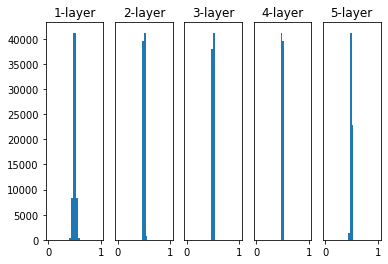

  👉 출력 값이 0.5 부근에 집중되는 것을 확인할 수 있다.

  👉 활성화 값이 치우쳤기 때문에 표현력을 제한한다.


2. Xavier 초깃값을 사용하였을 때
  - 앞 계층의 노드 개수가 n개일 때 표준편차가 $\frac{1}{\sqrt{n}}$ 인 정규분포를 사용하는 것

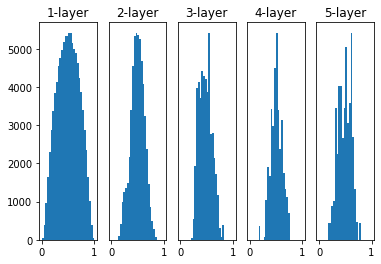

  👉 층이 깊어지면서 형태가 다소 일그러지지만, 확실히 넓게 분포됨을 알 수 있습니다.


## 6.2.3 ReLU를 사용할 때의 초깃값

위 코드를 수정하면 활성화 함수를 ReLU로 변경할 수 있고 이 때의 초깃값도 수정해보면서 실제 분포를 확인해 볼 수 있습니다.

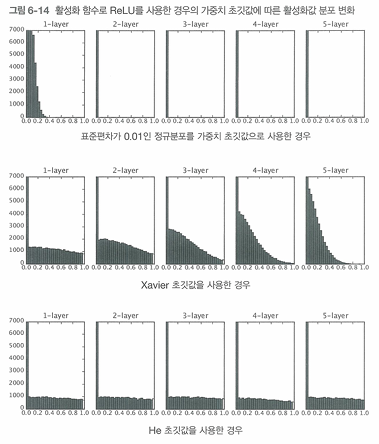

  👉 He 초깃값을 사용하였을 때 가장 넓게 퍼져있는 것을 확인할 수 있습니다.

## 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

MNIST 데이터 셋을 가지고 3가지 경우의 초깃값에서 학습에 얼마나 영향을 주는지 확인해 볼 수 있습니다.

In [ ]:
# github에서 필요한 코드 불러오기
! git clone https://github.com/youbeebee/deeplearning_from_scratch.git
# 주소 맞춤
! mv ./deeplearning_from_scratch/dataset ./
! mv ./deeplearning_from_scratch/common ./

Cloning into 'deeplearning_from_scratch'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 58.06 MiB | 17.30 MiB/s, done.
Resolving deltas: 100% (74/74), done.


===========iteration:0===========
std=0.01:2.3025080080695135
Xavier:2.3101758809720785
He:2.3738845865232023
===========iteration:100===========
std=0.01:2.3018759403167124
Xavier:2.226264448473385
He:1.4167421453984232
===========iteration:200===========
std=0.01:2.3026556620570706
Xavier:2.102648421938424
He:0.7786388848607992
===========iteration:300===========
std=0.01:2.3011659827404314
Xavier:1.7704824574976135
He:0.48579706680541057
===========iteration:400===========
std=0.01:2.3027012000415525
Xavier:1.274604390916032
He:0.4380577331753177
===========iteration:500===========
std=0.01:2.2994625392578025
Xavier:0.9833379939105334
He:0.47791842116739397
===========iteration:600===========
std=0.01:2.2960254639872497
Xavier:0.6695371733224827
He:0.36353711213036655
===========iteration:700===========
std=0.01:2.302169626976502
Xavier:0.6784891419399793
He:0.4098020635940218
===========iteration:800===========
std=0.01:2.3006330640407286
Xavier:0.5141167840643461
He:0.317067595320

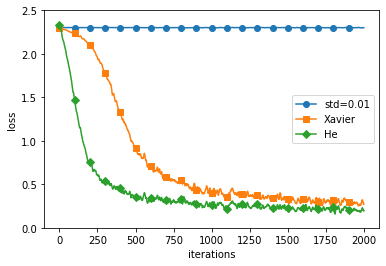

In [ ]:
# coding: utf-8
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

위 그래프를 보면

1. 표준편차가 0.01인 정규분포로 초깃값을 설정하면 학습이 잘 안된다.

2. Xaiver와 He 초깃값이 학습이 잘 되었고 특히 He 초깃값이 학습이 더 잘되었다.

👉 신경망 학습 시 초깃값은 아주 중요한 요소이다.

# 6.3 배치 정규화

배치 정규화의 각 층의 활성화 함수의 출력값을 강제로 퍼트리는 것을 말한다.

## 6.3.1 배치 정규화 알고리즘

배치 정규화의 장점
1. 학습을 빨리 진행할 수 있다.(학습 속도 개선)
2. 초깃값에 크게 의존하지 않는다.(초깃값 설정에 고민을 없애줌)
3. 오버피팅을 억제한다.(드롭아웃 등의 필요성 감소)

배치 정규화 계층을 삽입한 신경망은 다음과 같습니다.

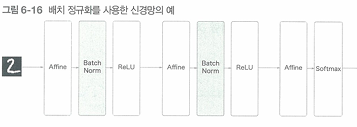



배치 정규화는 학습 시 미니배치 단위로 정규화하는 것을 말한다. 

데이터 분포가 평균이 0, 분식이 1이 되도록 정규화하는 것이다. 

수식은 다음과 같다.

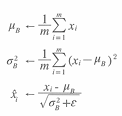

위의 수식에 따라서 입력 값을 평균이 0이고 분산이 1인 값으로 바꾸어 주고 그 다음 다음 수식을 통과시켜줍니다.

image.png

위의 수식에서 $ᵞ$와 $β$는 학습 가능한 파라미터 입니다. 이 수식이 바로 batchnormalization layer 입니다.

## 6.3.2 배치 정규화의 효과



============== 1/16 ==============
epoch:0 | 0.099 - 0.084


/content/common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
/content/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.101
epoch:2 | 0.097 - 0.125
epoch:3 | 0.097 - 0.157
epoch:4 | 0.097 - 0.17
epoch:5 | 0.097 - 0.186
epoch:6 | 0.097 - 0.2
epoch:7 | 0.097 - 0.204
epoch:8 | 0.097 - 0.22
epoch:9 | 0.097 - 0.237
epoch:10 | 0.097 - 0.254
epoch:11 | 0.097 - 0.273
epoch:12 | 0.097 - 0.293
epoch:13 | 0.097 - 0.314
epoch:14 | 0.097 - 0.323
epoch:15 | 0.097 - 0.334
epoch:16 | 0.097 - 0.347
epoch:17 | 0.097 - 0.364
epoch:18 | 0.097 - 0.369


epoch:19 | 0.097 - 0.378
============== 2/16 ==============
epoch:0 | 0.105 - 0.1


/content/common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
/content/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.154
epoch:2 | 0.097 - 0.239
epoch:3 | 0.097 - 0.249
epoch:4 | 0.097 - 0.257
epoch:5 | 0.097 - 0.271
epoch:6 | 0.097 - 0.291
epoch:7 | 0.097 - 0.306
epoch:8 | 0.097 - 0.322
epoch:9 | 0.097 - 0.338
epoch:10 | 0.097 - 0.365
epoch:11 | 0.097 - 0.363
epoch:12 | 0.097 - 0.388
epoch:13 | 0.097 - 0.415
epoch:14 | 0.097 - 0.415
epoch:15 | 0.097 - 0.434
epoch:16 | 0.097 - 0.455
epoch:17 | 0.097 - 0.464
epoch:18 | 0.097 - 0.478
epoch:19 | 0.097 - 0.487


/content/common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


============== 3/16 ==============
epoch:0 | 0.099 - 0.112
epoch:1 | 0.313 - 0.116
epoch:2 | 0.476 - 0.119
epoch:3 | 0.564 - 0.146
epoch:4 | 0.646 - 0.181
epoch:5 | 0.692 - 0.212
epoch:6 | 0.734 - 0.25
epoch:7 | 0.793 - 0.286
epoch:8 | 0.833 - 0.333
epoch:9 | 0.871 - 0.376
epoch:10 | 0.889 - 0.41
epoch:11 | 0.905 - 0.43
epoch:12 | 0.925 - 0.459
epoch:13 | 0.936 - 0.493
epoch:14 | 0.944 - 0.513
epoch:15 | 0.956 - 0.544
epoch:16 | 0.958 - 0.558
epoch:17 | 0.968 - 0.577
epoch:18 | 0.973 - 0.598


epoch:19 | 0.979 - 0.613
============== 4/16 ==============
epoch:0 | 0.139 - 0.095
epoch:1 | 0.27 - 0.118
epoch:2 | 0.44 - 0.162
epoch:3 | 0.535 - 0.247
epoch:4 | 0.617 - 0.302
epoch:5 | 0.66 - 0.371
epoch:6 | 0.695 - 0.427
epoch:7 | 0.72 - 0.485
epoch:8 | 0.735 - 0.533
epoch:9 | 0.76 - 0.571
epoch:10 | 0.77 - 0.599
epoch:11 | 0.782 - 0.628
epoch:12 | 0.805 - 0.652
epoch:13 | 0.829 - 0.665
epoch:14 | 0.819 - 0.689
epoch:15 | 0.853 - 0.706
epoch:16 | 0.853 - 0.731
epoch:17 | 0.861 - 0.739
epoch:18 | 0.881 - 0.748
epoch:19 | 0.883 - 0.76


============== 5/16 ==============
epoch:0 | 0.077 - 0.066
epoch:1 | 0.083 - 0.134
epoch:2 | 0.097 - 0.273
epoch:3 | 0.111 - 0.396
epoch:4 | 0.121 - 0.486
epoch:5 | 0.125 - 0.552
epoch:6 | 0.142 - 0.608
epoch:7 | 0.144 - 0.659
epoch:8 | 0.151 - 0.704
epoch:9 | 0.159 - 0.735
epoch:10 | 0.162 - 0.758
epoch:11 | 0.167 - 0.782
epoch:12 | 0.175 - 0.807
epoch:13 | 0.175 - 0.824
epoch:14 | 0.178 - 0.838
epoch:15 | 0.179 - 0.84
epoch:16 | 0.183 - 0.862
epoch:17 | 0.185 - 0.877
epoch:18 | 0.183 - 0.884


epoch:19 | 0.184 - 0.886
============== 6/16 ==============
epoch:0 | 0.103 - 0.096
epoch:1 | 0.116 - 0.194
epoch:2 | 0.133 - 0.448
epoch:3 | 0.116 - 0.609
epoch:4 | 0.116 - 0.67
epoch:5 | 0.116 - 0.721
epoch:6 | 0.116 - 0.763
epoch:7 | 0.116 - 0.781
epoch:8 | 0.116 - 0.81
epoch:9 | 0.116 - 0.835
epoch:10 | 0.116 - 0.856
epoch:11 | 0.116 - 0.869
epoch:12 | 0.119 - 0.888
epoch:13 | 0.116 - 0.897
epoch:14 | 0.116 - 0.906
epoch:15 | 0.116 - 0.921
epoch:16 | 0.116 - 0.924
epoch:17 | 0.116 - 0.935
epoch:18 | 0.116 - 0.937


epoch:19 | 0.116 - 0.948
============== 7/16 ==============
epoch:0 | 0.117 - 0.142
epoch:1 | 0.116 - 0.263
epoch:2 | 0.116 - 0.523
epoch:3 | 0.116 - 0.637
epoch:4 | 0.116 - 0.706
epoch:5 | 0.116 - 0.761
epoch:6 | 0.116 - 0.796
epoch:7 | 0.116 - 0.845
epoch:8 | 0.116 - 0.873
epoch:9 | 0.116 - 0.908
epoch:10 | 0.116 - 0.928
epoch:11 | 0.116 - 0.943
epoch:12 | 0.116 - 0.964
epoch:13 | 0.116 - 0.966
epoch:14 | 0.116 - 0.974
epoch:15 | 0.116 - 0.986
epoch:16 | 0.116 - 0.989
epoch:17 | 0.116 - 0.993
epoch:18 | 0.116 - 0.994
epoch:19 | 0.116 - 0.995


============== 8/16 ==============
epoch:0 | 0.097 - 0.127
epoch:1 | 0.116 - 0.491
epoch:2 | 0.116 - 0.682
epoch:3 | 0.116 - 0.745
epoch:4 | 0.116 - 0.798
epoch:5 | 0.116 - 0.83
epoch:6 | 0.116 - 0.858
epoch:7 | 0.116 - 0.878
epoch:8 | 0.116 - 0.899
epoch:9 | 0.116 - 0.921
epoch:10 | 0.116 - 0.939
epoch:11 | 0.116 - 0.96
epoch:12 | 0.116 - 0.982
epoch:13 | 0.116 - 0.992
epoch:14 | 0.116 - 0.994
epoch:15 | 0.116 - 0.994
epoch:16 | 0.116 - 0.995
epoch:17 | 0.116 - 0.996
epoch:18 | 0.116 - 0.998


epoch:19 | 0.116 - 0.998
============== 9/16 ==============
epoch:0 | 0.105 - 0.107
epoch:1 | 0.099 - 0.633
epoch:2 | 0.117 - 0.748
epoch:3 | 0.117 - 0.812
epoch:4 | 0.116 - 0.851
epoch:5 | 0.117 - 0.876
epoch:6 | 0.116 - 0.894
epoch:7 | 0.116 - 0.923
epoch:8 | 0.117 - 0.952
epoch:9 | 0.117 - 0.955
epoch:10 | 0.117 - 0.991
epoch:11 | 0.116 - 0.994
epoch:12 | 0.116 - 0.996
epoch:13 | 0.116 - 0.996
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999


============== 10/16 ==============
epoch:0 | 0.094 - 0.105
epoch:1 | 0.099 - 0.291
epoch:2 | 0.117 - 0.748
epoch:3 | 0.117 - 0.839
epoch:4 | 0.117 - 0.856
epoch:5 | 0.117 - 0.908
epoch:6 | 0.117 - 0.959
epoch:7 | 0.117 - 0.958
epoch:8 | 0.117 - 0.968
epoch:9 | 0.117 - 0.989
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.99
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.986
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 1.0


epoch:19 | 0.116 - 1.0
============== 11/16 ==============
epoch:0 | 0.097 - 0.162
epoch:1 | 0.099 - 0.593
epoch:2 | 0.117 - 0.733
epoch:3 | 0.117 - 0.767
epoch:4 | 0.117 - 0.82
epoch:5 | 0.117 - 0.857
epoch:6 | 0.117 - 0.862
epoch:7 | 0.117 - 0.869
epoch:8 | 0.117 - 0.879
epoch:9 | 0.116 - 0.864
epoch:10 | 0.116 - 0.887
epoch:11 | 0.116 - 0.887
epoch:12 | 0.116 - 0.794
epoch:13 | 0.117 - 0.884
epoch:14 | 0.117 - 0.9
epoch:15 | 0.117 - 0.898
epoch:16 | 0.116 - 0.89
epoch:17 | 0.116 - 0.9
epoch:18 | 0.116 - 0.899


epoch:19 | 0.117 - 0.874
============== 12/16 ==============
epoch:0 | 0.117 - 0.204
epoch:1 | 0.117 - 0.616
epoch:2 | 0.117 - 0.613
epoch:3 | 0.117 - 0.736
epoch:4 | 0.117 - 0.76
epoch:5 | 0.117 - 0.774
epoch:6 | 0.117 - 0.768
epoch:7 | 0.117 - 0.832
epoch:8 | 0.117 - 0.855
epoch:9 | 0.117 - 0.872
epoch:10 | 0.117 - 0.847
epoch:11 | 0.117 - 0.883
epoch:12 | 0.117 - 0.889
epoch:13 | 0.117 - 0.896
epoch:14 | 0.117 - 0.897
epoch:15 | 0.117 - 0.897
epoch:16 | 0.117 - 0.893
epoch:17 | 0.117 - 0.985
epoch:18 | 0.117 - 0.885


epoch:19 | 0.117 - 0.975
============== 13/16 ==============
epoch:0 | 0.116 - 0.095
epoch:1 | 0.116 - 0.484
epoch:2 | 0.116 - 0.552
epoch:3 | 0.116 - 0.587
epoch:4 | 0.116 - 0.585
epoch:5 | 0.116 - 0.537
epoch:6 | 0.117 - 0.614
epoch:7 | 0.117 - 0.574
epoch:8 | 0.116 - 0.595
epoch:9 | 0.116 - 0.595
epoch:10 | 0.116 - 0.591
epoch:11 | 0.116 - 0.596
epoch:12 | 0.116 - 0.683
epoch:13 | 0.116 - 0.702
epoch:14 | 0.116 - 0.704
epoch:15 | 0.116 - 0.711
epoch:16 | 0.117 - 0.711
epoch:17 | 0.116 - 0.706
epoch:18 | 0.116 - 0.712


epoch:19 | 0.116 - 0.713
============== 14/16 ==============
epoch:0 | 0.116 - 0.101
epoch:1 | 0.116 - 0.382
epoch:2 | 0.116 - 0.395
epoch:3 | 0.116 - 0.412
epoch:4 | 0.117 - 0.475
epoch:5 | 0.117 - 0.467
epoch:6 | 0.117 - 0.461
epoch:7 | 0.117 - 0.506
epoch:8 | 0.117 - 0.503
epoch:9 | 0.117 - 0.513
epoch:10 | 0.117 - 0.52
epoch:11 | 0.117 - 0.501
epoch:12 | 0.117 - 0.52
epoch:13 | 0.117 - 0.524
epoch:14 | 0.117 - 0.516
epoch:15 | 0.117 - 0.528
epoch:16 | 0.117 - 0.527
epoch:17 | 0.117 - 0.529


epoch:18 | 0.117 - 0.524
epoch:19 | 0.117 - 0.521
============== 15/16 ==============
epoch:0 | 0.117 - 0.133
epoch:1 | 0.116 - 0.396
epoch:2 | 0.116 - 0.371
epoch:3 | 0.116 - 0.504
epoch:4 | 0.116 - 0.494
epoch:5 | 0.116 - 0.506
epoch:6 | 0.116 - 0.515
epoch:7 | 0.116 - 0.511
epoch:8 | 0.117 - 0.511
epoch:9 | 0.117 - 0.512
epoch:10 | 0.117 - 0.519
epoch:11 | 0.117 - 0.521
epoch:12 | 0.117 - 0.522
epoch:13 | 0.117 - 0.527
epoch:14 | 0.117 - 0.523
epoch:15 | 0.117 - 0.526
epoch:16 | 0.117 - 0.535
epoch:17 | 0.117 - 0.551
epoch:18 | 0.117 - 0.536


epoch:19 | 0.117 - 0.543
============== 16/16 ==============
epoch:0 | 0.116 - 0.208
epoch:1 | 0.117 - 0.228
epoch:2 | 0.116 - 0.316
epoch:3 | 0.117 - 0.321
epoch:4 | 0.116 - 0.384
epoch:5 | 0.117 - 0.471
epoch:6 | 0.117 - 0.46
epoch:7 | 0.117 - 0.505
epoch:8 | 0.117 - 0.501
epoch:9 | 0.117 - 0.484
epoch:10 | 0.117 - 0.507
epoch:11 | 0.117 - 0.52
epoch:12 | 0.117 - 0.517
epoch:13 | 0.117 - 0.518
epoch:14 | 0.117 - 0.522
epoch:15 | 0.117 - 0.516
epoch:16 | 0.117 - 0.525
epoch:17 | 0.117 - 0.518
epoch:18 | 0.117 - 0.525
epoch:19 | 0.117 - 0.525


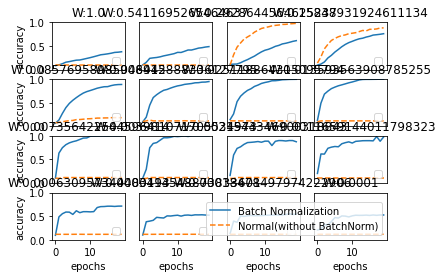

In [ ]:
# coding: utf-8
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784,
                                     hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size=10,
                                     weight_init_std=weight_init_std,
                                     use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784,
                                  hidden_size_list=[100, 100, 100, 100, 100],
                                  output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - "
                  + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print("============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4, 4, i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list,
                 label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--",
                 label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

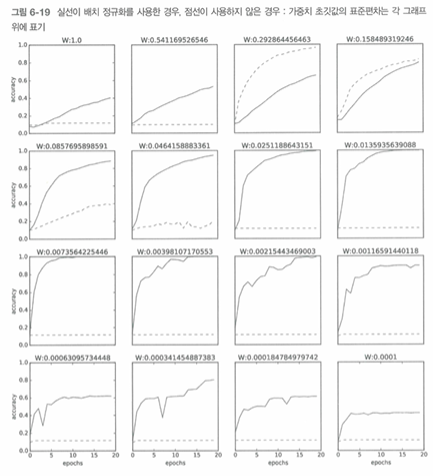

각 가중치의 초깃값의 표준편차는 각 그래프 위에 표기 되어 있다.

거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타납니다.

배치 정규화를 이용하지 않는 경우엔 초깃값이 잘 분포되어 있지 않으면 학습이 전혀 진행되지 않는 모습을 확인 할 수 있다.

=> 배치 정규화를 이용하면 학습이 빨라지고 가중치 초깃값에 크게 의존하지않는 장점이 있다.


# 6.4 바른 학습을 위해

기계 학습에서는 오버피팅 문제가 있다.

오버피팅은 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태이다.

기계학습은 "범용 성능"을 지향한다. 이는 곧 한번도 보지 못한 데이터에 대해서 바르게 식별하는 것을 말한다.



## 6.4.1 오버피팅

오버피팅은 주로 다음의 두 경우에서 일어납니다.

* 매개변수가 많고 표현력이 높은 모델
* 훈련 데이터가 적은 경우


이번 절에서는 강제로 두 요건을 충족시켜 오버피팅을 일으켜보겠습니다.

그러기 위해 본래 60,000인 MNIST 데이터셋의 훈련 데이터 중 300개만 사용하고, 7층 네트워크를 사용해 네트워크를 사용해 네트워크의 복잡성을 높이겠습니다. 

각 층의 뉴런은 100개, 활성화 함수는 ReLU를 사용합니다.

epoch:0, train acc:0.12, test acc:0.1066
epoch:1, train acc:0.11666666666666667, test acc:0.1129
epoch:2, train acc:0.13333333333333333, test acc:0.1227
epoch:3, train acc:0.15333333333333332, test acc:0.1305
epoch:4, train acc:0.18, test acc:0.1458
epoch:5, train acc:0.19666666666666666, test acc:0.1553
epoch:6, train acc:0.21666666666666667, test acc:0.1655
epoch:7, train acc:0.22666666666666666, test acc:0.1793
epoch:8, train acc:0.2633333333333333, test acc:0.2003
epoch:9, train acc:0.29, test acc:0.2097
epoch:10, train acc:0.30666666666666664, test acc:0.2172
epoch:11, train acc:0.3566666666666667, test acc:0.2305
epoch:12, train acc:0.38666666666666666, test acc:0.2535
epoch:13, train acc:0.4166666666666667, test acc:0.2935
epoch:14, train acc:0.47333333333333333, test acc:0.3229
epoch:15, train acc:0.5233333333333333, test acc:0.3328
epoch:16, train acc:0.5633333333333334, test acc:0.3529
epoch:17, train acc:0.5933333333333334, test acc:0.3705
epoch:18, train acc:0.62, test acc:

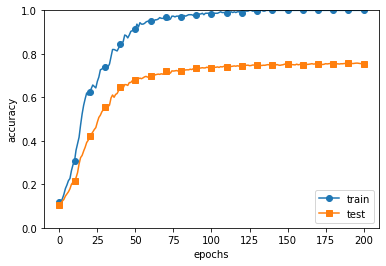

In [ ]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
# weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

위 그래프를 보면 훈련데이터의 정확도는 100 에폭을 지나는 무렵부터 거의 100%이지만 시험 데이터의 정확도는 77% 정도로 큰 차이를 보인다는 것을 확인할 수 있습니다.

바로 이것이 훈련데이터에만 너무 적응하여 시험 데이터에서 좋지 않은 성능을 보이는 오버 피팅 현상입니다.

## 6.4.2 가중치 감소

오버피팅이 일어나는 원인 중 하나는 가중치 매개변수의 값이 큰 것이다. 

이를 해결하는 방법은 가중치 감소(weight decay) 방법을 활용하여 값이 큰 가중치에 대해서는 그에 상응하는 큰 페널티(loss 값이 커짐)를 주는 것이다.

보통 가중치의 L2 norm을 손실 함수에 더한다. 이를 자세히 보면 신경망의 손실 함수 결과 값에 $\frac{1}{2}λW^2$을 더하는 것이고, 이는 각각의 가중치 관점에서는 grad값에 $λW$를 더하는 것과 같다.

(참고) 
* 학습이 진행 될 때에는 손실함수에서 출력된 값을 활용한다. 이때 손실함수 값이 크다는 것은 더 많은 변화, 곧 더 많은 페널티를 준다는 의미이고 손실함수 값이 작다는 것은 더 적은 변화를 준다는 것이다. 

* 따라서 가중치 감소 방법은 가중치가 큰 것이 있을 때 이에 비례하여 손실 함수 값을 키워서 페널티를 준다는 것이다. 

epoch:0, train acc:0.10333333333333333, test acc:0.0994
epoch:1, train acc:0.09666666666666666, test acc:0.0964
epoch:2, train acc:0.10666666666666667, test acc:0.0961
epoch:3, train acc:0.11, test acc:0.1018
epoch:4, train acc:0.11, test acc:0.1103
epoch:5, train acc:0.13, test acc:0.119
epoch:6, train acc:0.14333333333333334, test acc:0.1323
epoch:7, train acc:0.16, test acc:0.1454
epoch:8, train acc:0.19333333333333333, test acc:0.1612
epoch:9, train acc:0.22333333333333333, test acc:0.1757
epoch:10, train acc:0.24, test acc:0.1931
epoch:11, train acc:0.26666666666666666, test acc:0.2181
epoch:12, train acc:0.30333333333333334, test acc:0.2391
epoch:13, train acc:0.32, test acc:0.2513
epoch:14, train acc:0.34, test acc:0.268
epoch:15, train acc:0.36333333333333334, test acc:0.2876
epoch:16, train acc:0.3933333333333333, test acc:0.297
epoch:17, train acc:0.4, test acc:0.3053
epoch:18, train acc:0.4033333333333333, test acc:0.3146
epoch:19, train acc:0.43666666666666665, test acc:0.3

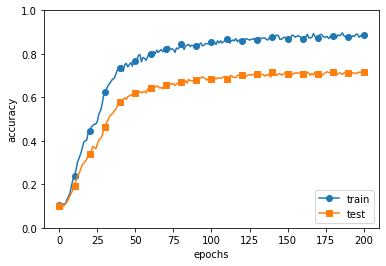

In [ ]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

위 그래프에서 확인 할 수 있는 점
1. 훈련데이터 성능이 100%가 아니라는 것 => 훈련데이터에 오버피팅 되지 않았다는 결론을 내릴 수 있다.
2. 오버피팅이 되지 않았기 때문에 훈련데이터 성능과 시험 데이터 성능의 차이가 줄어든 것을 알 수 있다.

## 6.4.3 드롭아웃

신경망 모델이 복잡해져서 가중치 감소로 오버피팅 문제를 해결할 수 없을 떄 드롭아웃 기법을 사용하기도 한다.

드롭아웃은 각 레이어의 뉴런을 임의로 삭제하면서 학습하는 방법이다.

훈련 때마다 삭제할 뉴런을 임의로 선택하여 그 결과로 학습을 진행하고 시험 때는 모든 뉴런을 살려서 추론하고 그 결과 값을 이전에 뉴런을 삭제한 비율만큼 곱하여 출력한다.

하지만 실제 딥러닝 프레임워크에서는 비율을 곱하지 않는다.(forward에서 dropout 처리를 잘 해두었기 때문이다.)


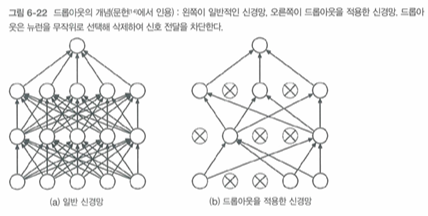


In [ ]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else: # test 시에 dropout 적용하지 않고 학습 때 적용했던 비율만큼 출력에 곱해준다.
      return x * (1.0 - self.dropout_ratio)

  def backward(self, dout): # dropout시 없어지지 않은 뉴런만 업데이트
    return dout * self.mask

위 코드를 보면 다음을 알 수 있다.
* 훈련 시 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시한다는 것
* 순전파 때 통과시키지 않은 뉴런은 역전파에서도 신호를 차단하다는 것


train loss:2.3178388892200545
=== epoch:1, train acc:0.09333333333333334, test acc:0.0801 ===
train loss:2.31266849579417
train loss:2.305283014932703
train loss:2.2946254273046853
=== epoch:2, train acc:0.09666666666666666, test acc:0.0852 ===
train loss:2.2948657172147597
train loss:2.321849938352227
train loss:2.3041383242708178
=== epoch:3, train acc:0.09666666666666666, test acc:0.0909 ===
train loss:2.30131777853059
train loss:2.301908425150126
train loss:2.289831496405101
=== epoch:4, train acc:0.10333333333333333, test acc:0.0964 ===
train loss:2.3081235010143066
train loss:2.265578426912191
train loss:2.2880504819682925
=== epoch:5, train acc:0.11, test acc:0.1043 ===
train loss:2.2923978954477477
train loss:2.2954297305551274
train loss:2.3001202859009933
=== epoch:6, train acc:0.11333333333333333, test acc:0.1081 ===
train loss:2.294226315090005
train loss:2.289045939147862
train loss:2.29882029861149
=== epoch:7, train acc:0.12, test acc:0.1135 ===
train loss:2.282274156008

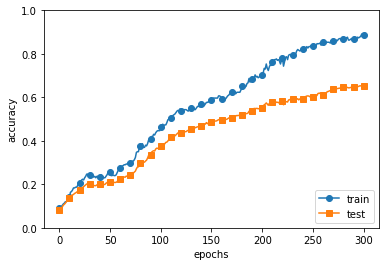

In [ ]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNetExtend(input_size=784,
                              hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout,
                              dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
# epoch:301, train acc:0.73, test acc:0.6315

다음은 dropout을 사용하였을 때와 사용하지 않았을 때의 비교입니다.

* dropout을 사용하지 않은 경우

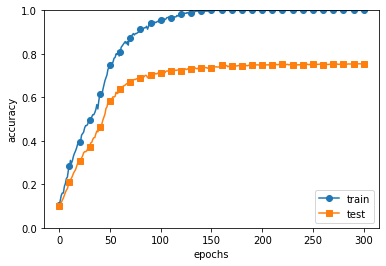

* dropout을 사용한 경우

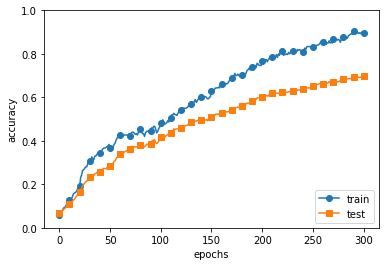

위 그래프 결과도 마찬가지로 dropout을 사용하지 않으면 오버피팅이 발생하여 훈련데이터 성능은 100%에 가까워지고 훈련 데이터 성능과 시험 데이터 성능의 차이가 커지게 된다.

dropout을 사용하면 오버피팅이 덜 발생하는 것을 알 수 있다.




(참고)
기계 학습에는 앙상블 학습을 애용한다. 이는 개별적으로 학습시킨 여러 모델의 출력을 평균내어 추론하는 방식이다.

신경망의 맥락에서는 각각 같거나 비슷한 구조의 네트워크를 5개 준비하여 따로따로 다른 하이퍼파라미터에 대해 학습시키고 시험 때는 그 5개의 출력을 평균내어 답하는 것이다.

또한 앙상블 기법을 활용하여 성능이 몇% 정도 개선된다는 것이 실험적으로 알려져 있다.

여기서 드롭아웃은 모델의 구조가 훈련 때마다 랜덤한 뉴런을 무시하면서 바뀐다고 볼 수 있기 때문에 앙상블 기법을 한 모델 내에서 수행하는 것과 같은 효과를 낸다고 생각해 볼 수 있다.

# 6.5 적절한 하이퍼파라미터 값 찾기

하이퍼 파라미터에는 다음과 같은 것들이 있다.
* 각 층의 뉴런 수
* 배치 크기
* 매개변수 갱신 시 학습률
* 가중치 감소 값 등

=> 하이퍼 파라미터에 의해 모델의 성능이 좌우될 수 있기 때문에 적절한 값을 사용하는 것이 성능에 유리하다.

=> 적절한 값을 찾는 방법은 많은 시행착오를 거쳐 탐색하는 것이다.

## 6.5.1 검증 데이터(Validation dataset)

우리는 지금까지 훈련 데이터(Train dataset)과 시험 데이터(Test dataset)으로 데이터를 나누어 다뤄왔다.

훈련 데이터는 학습 시 사용하는 데이터이고 시험 데이터는 모델의 범용 능력을 확인하는 데이터이다.

검증 데이터는 하이퍼 파라미터가 적절한지를 파악하는 데이터이다. 만약 하이퍼 파라미터가 적절한지 파악할 때 시험 데이터를 활용하면 이 과정에서 시험 데이터에 오버피팅 될 수 있기 때문에 반드시 이를 구분해야한다.


따라서 정리하면 다음과 같다.
* 훈련 데이터 : 매개변수 학습 시 사용
* 검증 데이터 : 하이퍼파라미터 성능 평가 시 사용
* 시험 데이터 : 신경망의 범용 성능 평가 시 사용

다음은 실습 입니다.

MNIST 데이터셋은 훈련데이터와 시험 데이터로만 나뉘어 있기 때문에 추가적으로 훈련 데이터의 20%정도를 검증 데이터로 분리하는 작업이 필요합니다.

In [ ]:
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

print(f'훈련 데이터 수 : {x_train.shape[0]}')
print(f'검증 데이터 수 : {x_val.shape[0]}')
print(f'시험 데이터 수 : {x_test.shape[0]}')

훈련 데이터 수 : 400
검증 데이터 수 : 100
시험 데이터 수 : 10000


## 6.5.2 하이퍼파라미터 최적화

하이퍼파라미터를 최적화할 때 핵심은 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것이다.

보통 10의 거듭제곱 단위로 범위를 지정한다.

하이퍼파라미터를 최적화할 때는 딥러닝 학습에 오랜 시간이 걸린다는 점을 기억해야합니다. 따라서 나쁠 듯한 값은 일찍 포기하는 것이 좋다. 또한 학습을 위한 에폭을 작게하여, 1회 평가에 걸리는 시간을 단축하는 것이 효과적입니다.



**하이퍼파라미터 최적화 과정**

0단계
  * 하이퍼파라미터의 값의 범위를 설정합니다.

1단계
  * 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출합니다.

2단계
  * 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가합니다.(단, 에폭은 작게 설정합니다.)

3단계
  * 1단계와 2단계를 특정횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힙니다.

=> 이러한 방식으로 하이퍼파라미터의 범위를 좁혀가고 그 범위 내에서 최적의 값을 하나 골라 최종 학습에 사용합니다.

(참고)

하이퍼 파라미터 탐색은 인간의 '지혜'와 '직관'에 의존적이라는 느낌이 있습니다. 이를 세련되게 할 수 있는 방법은 '베이즈 최적화'입니다. 

베이즈 최적화는 베이즈 정리를 중심으로 수학 이론을 구사하여 더 엄밀하고 효율적으로 최적화를 수행하는 것을 말합니다.

## 6.5.3 하이퍼파라미터 최적화 구현하기

하이퍼파라미터 검증은 0.001 ~ 1,000사이의 같은 로그 스케일 범위에서 무작위로 추출하여 수행합니다.

여기 예시에서는 가중치 감소 계수를 $10^{-8}$ ~ $10^{-4}$, 학습률을 $10^{-6}$ ~ $10^{-2}$ 범위에서 시작합니다.


val acc:0.62 | lr:0.005687343248491415, weight decay:4.382885408586501e-06
val acc:0.17 | lr:0.0005642046865033376, weight decay:1.7897097499790313e-06
val acc:0.05 | lr:2.3046237007379926e-06, weight decay:1.9451064710418613e-06
val acc:0.57 | lr:0.004356395325629584, weight decay:1.9197870528519508e-08
val acc:0.23 | lr:0.0009034461567933101, weight decay:2.496493764059159e-07
val acc:0.09 | lr:3.5816682076875067e-05, weight decay:5.808890660557514e-08
val acc:0.69 | lr:0.005588005506708467, weight decay:1.2985115758481598e-07
val acc:0.09 | lr:1.9870801612913924e-06, weight decay:1.3948398366981847e-08
val acc:0.22 | lr:0.0018918734901082388, weight decay:1.740768642214591e-08
val acc:0.33 | lr:0.0019784891791446713, weight decay:3.6494020209771885e-05
val acc:0.41 | lr:0.002282752015626996, weight decay:1.330248339891159e-05
val acc:0.1 | lr:2.887156045105253e-05, weight decay:5.784401438447965e-05
val acc:0.08 | lr:0.00023823122657100712, weight decay:7.113431442600466e-05
val acc

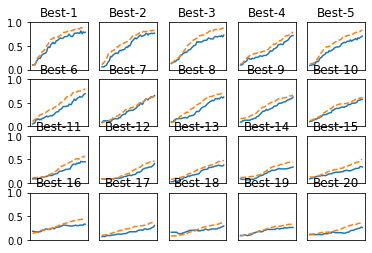

In [ ]:
# coding: utf-8
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd',
                      optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

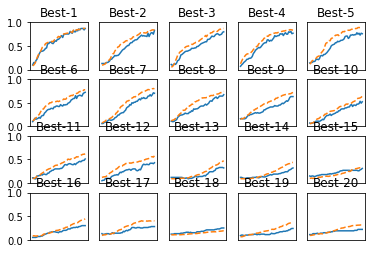

위 그래프는 정확도가 높은 순서대로 나열한 것이다.

하이퍼 파라미터를 살펴보면 다음과 같다.
=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.87) | lr:0.006325616988328668, weight decay:8.727343565383648e-06

Best-2(val acc:0.83) | lr:0.007233249167696717, weight decay:1.390833658945192e-07

Best-3(val acc:0.8) | lr:0.007238655592092824, weight decay:1.5714234055028221e-07

Best-4(val acc:0.77) | lr:0.008058270780403472, weight decay:1.7075489921704612e-08

Best-5(val acc:0.76) | lr:0.009830251107206683, weight decay:2.742977800734484e-07

Best-6(val acc:0.72) | lr:0.005836478380805019, weight decay:1.47714900556418e-08

Best-7(val acc:0.7) | lr:0.005783469459369299, weight decay:4.854947930899735e-06

Best-8(val acc:0.67) | lr:0.0050927490450464645, weight decay:1.420566484582498e-05

Best-9(val acc:0.63) | lr:0.004654687362866303, weight decay:3.571381864466105e-08

Best-10(val acc:0.52) | lr:0.0045941462455791615, weight decay:1.218189106437786e-05

Best-11(val acc:0.51) | lr:0.0039988192613283026, weight decay:4.00711179140711e-07

Best-12(val acc:0.43) | lr:0.0033014544407960512, weight decay:6.582242049494225e-05

Best-13(val acc:0.32) | lr:0.0017747818222631627, weight decay:1.7113131020242567e-08

Best-14(val acc:0.32) | lr:0.0017691568616554102, weight decay:8.996029053779053e-06

Best-15(val acc:0.31) | lr:0.001264269410402473, weight decay:4.763243687762913e-06

Best-16(val acc:0.3) | lr:0.0021984752160146143, weight decay:4.094456843619485e-05

Best-17(val acc:0.28) | lr:0.00330171973830312, weight decay:3.1014368479674213e-07

Best-18(val acc:0.25) | lr:0.0003627662113825349, weight decay:2.301537666695575e-08

Best-19(val acc:0.24) | lr:0.001505383836025575, weight decay:4.930585684071833e-05

Best-20(val acc:0.22) | lr:0.0010621628646989962, weight decay:3.3286587053343315e-05

이와 같이 'Best-5'까지의 결과를 보면 성능이 좋은 결과는 학습률은 0.001 ~ 0.01, 가중치 감소 계수를 $10^{-8}$ ~ $10^{-6}$ 정도라는 것을 알 수 있다.

이에 따라 추후 좋은 성능의 모델을 학습시킬 때 하이퍼파라미터를 설정해주면 된다.

# 6.6 정리

* 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.
* 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다.
* 가중치의 초깃값으로는 'Xaiver 초깃값'과 'He 초깃값'이 효과적이다.
* 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
* 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
* 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.